steps:

1-importing all the libraries

2-loading datasets

3-initial exploration

4-data cleaning

5-data analysis

 Pricing Optimization
Problem: Hosts may struggle to set competitive prices that both attract guests and maximize their revenue.

Objective: How can Airbnb hosts optimize their pricing strategy to increase occupancy while maximizing revenue, considering factors such as room type, location, and demand?
Impact: Poorly set prices could lead to either too many vacant listings or lost revenue due to underpricing.
Solution: Implement a dynamic pricing model that adjusts based on seasonality, local demand, and listing characteristics.


2. Improving Guest Ratings and Reviews
Problem: Some listings may receive poor ratings or limited reviews, affecting the reputation of hosts and the platform's overall user experience.

Objective: How can hosts improve guest satisfaction and achieve higher ratings through adjustments in listing characteristics like amenities, cleanliness, and responsiveness?
Impact: Negative reviews can decrease bookings, while positive reviews can improve visibility and trust.
Solution: Identify key factors influencing ratings and provide recommendations for hosts to improve their service (e.g., adding more amenities, adjusting pricing).


# 1-importing all the libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# 2-loading datasets

In [2]:
df = pd.read_csv("D:\\datasets.csv",encoding_errors = 'ignore')

# 3-initial exploration

In [3]:
df.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
14273,8.770000e+17,Rental unit in Brooklyn · 3 bedrooms · 4 beds ...,97402944,Zaki,Brooklyn,Fort Hamilton,40.616460,-74.031823,Entire home/apt,155.0,...,15/09/23,0.26,1.0,365.0,1.0,No License,No rating,3,4,2
18670,7.750000e+17,Serviced apartment in New York · ★4.75 · 1 bed...,28260018,Bp Stays.,Manhattan,Upper East Side,40.776690,-73.949310,Private room,50.0,...,10/11/23,2.75,22.0,228.0,32.0,No License,4.75,1,1,2
16327,2.148503e+07,Rental unit in Brooklyn · ★5.0 · 1 bedroom · 1...,134419840,Damary,Brooklyn,Bushwick,40.692286,-73.904050,Private room,60.0,...,14/05/19,0.05,1.0,149.0,0.0,No License,5,1,1,1
17027,2.534710e+05,Rental unit in Brooklyn · ★4.79 · 1 bedroom · ...,417504,The Box House Hotel,Brooklyn,Greenpoint,40.737560,-73.953500,Entire home/apt,223.0,...,11/11/22,0.23,30.0,317.0,0.0,Exempt,4.79,1,2,1
8381,6.560000e+17,Rental unit in Queens · ★4.88 · 1 bedroom · 1 ...,409693867,Diego,Queens,Maspeth,40.719660,-73.901850,Private room,80.0,...,26/09/23,3.53,1.0,0.0,37.0,No License,4.88,1,1,1.5


In [4]:
df.shape

(20770, 22)

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


# Data Cleaning

In [8]:
df.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64

In [9]:
#dropping all missing values

df.dropna(inplace = True)

In [10]:
df.shape

(20736, 22)

In [11]:
#check duplicate
df.duplicated().sum()

12

In [12]:
#see the duplicate records
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
6,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
7,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
8,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
9,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1
10,4.958498e+07,Rental unit in New York · ★5.0 · 1 bedroom · 1...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.759950,-73.992960,Entire home/apt,115.0,...,29/07/23,0.16,139.0,276.0,2.0,No License,5,1,1,1
20736,7.990000e+17,Rental unit in New York · 2 bedrooms · 2 beds ...,224733902,CozySuites Copake,Manhattan,Upper East Side,40.768970,-73.957592,Entire home/apt,153.0,...,15/09/23,0.41,8.0,308.0,2.0,No License,No rating,2,2,2
20737,5.930000e+17,Rental unit in New York · ★4.79 · 2 bedrooms ·...,23219783,Rob,Manhattan,West Village,40.730220,-74.002910,Entire home/apt,175.0,...,22/11/23,2.03,4.0,129.0,25.0,No License,4.79,2,2,1
20738,9.230000e+17,Loft in New York · ★4.33 · 1 bedroom · 2 beds ...,520265731,Rodrigo,Manhattan,Greenwich Village,40.728390,-73.999540,Entire home/apt,156.0,...,02/01/24,2.60,1.0,356.0,9.0,Exempt,4.33,1,2,1
20739,1.336161e+07,Rental unit in New York · ★4.89 · 2 bedrooms ·...,8961407,Jamie,Manhattan,Harlem,40.805700,-73.946250,Entire home/apt,397.0,...,08/09/23,1.08,3.0,274.0,3.0,No License,4.89,2,2,1
20740,5.119566e+07,Rental unit in New York · Studio · 1 bed · 1 bath,51501835,Jeniffer,Manhattan,Chinatown,40.718360,-73.995850,Entire home/apt,100.0,...,25/05/23,0.08,139.0,306.0,1.0,No License,No rating,Studio,1,1


In [13]:
#deleting all duplicate records
df.drop_duplicates(inplace = True)

In [14]:
df.duplicated().sum()

0

In [15]:
#type casting

In [16]:
df.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [17]:
df['id'] = df['id'].astype(object)

In [18]:
df['host_id'] = df['host_id'].astype(object)

# feature engineering

In [19]:
df['bed per price'] = df['price']/df['beds']

In [20]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'bed per price'],
      dtype='object')

# EDA
# Data Analysis


# Rental Performance, Trends, and Availability

# univariate analysis

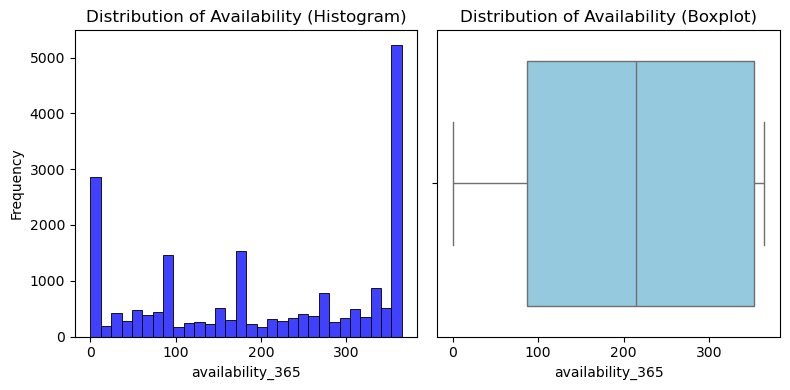

In [21]:
# Create a figure with 2 subplots: Histogram and Boxplot
plt.figure(figsize=(8, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['availability_365'], kde=False, bins=30, color='blue')
plt.title('Distribution of Availability (Histogram)')
plt.xlabel('availability_365')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['availability_365'], color='skyblue')
plt.title('Distribution of Availability (Boxplot)')
plt.xlabel('availability_365')

# Show the plots
plt.tight_layout()
plt.show()

#Investigate the reasons for 0 availability listings to identify inactive hosts or incorrect data entries.

Many properties have either very low or very high availability.
Action: Optimize pricing for properties with high availability to maximize their revenue potential.

Focus on analyzing year-round listings to optimize pricing and enhance host profitability.
    
Seasonal trends (clusters near 100, 200, or 300 days) might require tailored strategies to maximize revenue during peak availability.

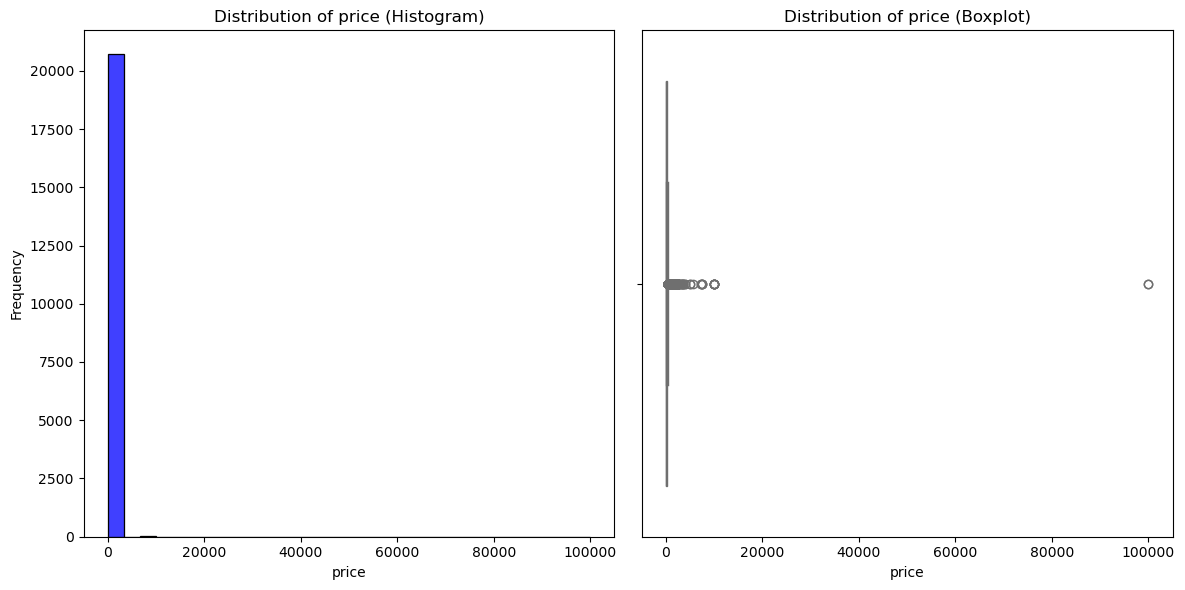

In [22]:
# Create a figure with 2 subplots: Histogram and Boxplot
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=False, bins=30, color='blue')
plt.title('Distribution of price (Histogram)')
plt.xlabel('price')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'], color='skyblue')
plt.title('Distribution of price (Boxplot)')
plt.xlabel('price')

# Show the plots
plt.tight_layout()
plt.show()

#seen the above i found there is present outliers ,lets handell the outliers

In [23]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.5)
Q3 = df['price'].quantile(0.95)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Replace outliers with the lower or upper limit
df['price'] = df['price'].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)

# Print the new summary statistics
print("Updated Price Column Statistics:")
print(df['price'].describe())

Updated Price Column Statistics:
count    20724.000000
mean       166.735349
std        144.592188
min         10.000000
25%         80.000000
50%        125.000000
75%        199.000000
max        887.125000
Name: price, dtype: float64


<Axes: ylabel='price'>

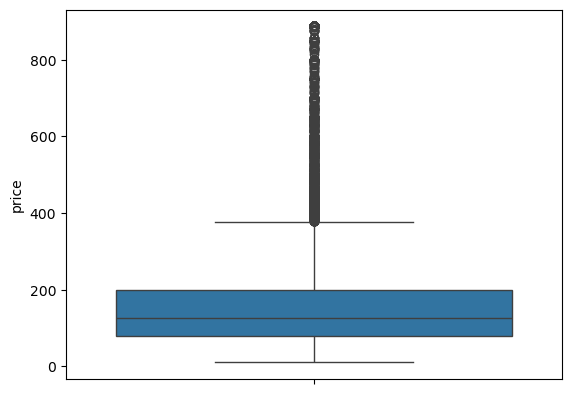

In [24]:
sns.boxplot(df['price'])

<Axes: xlabel='minimum_nights', ylabel='Count'>

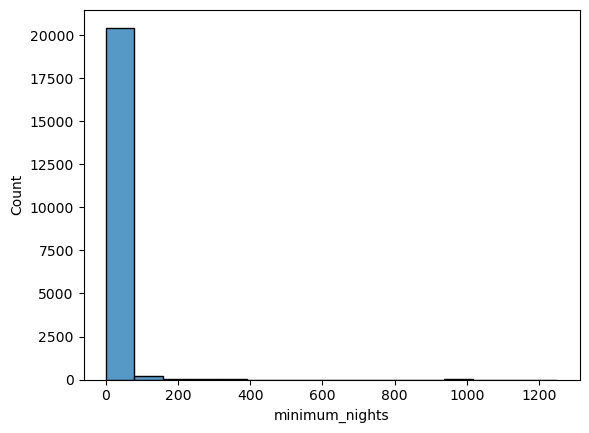

In [25]:
sns.histplot(df['minimum_nights'])

1. Most properties receive few reviews per month.
The majority of properties have a very low review rate, with most falling between 0 and 1 reviews per month. This suggests that many properties either don't receive many bookings or don't receive many reviews from their guests.

2. A small number of properties receive many reviews per month.
There is a long tail to the right of the histogram, indicating that a small number of properties receive a large number of reviews per month. This could be due to a variety of factors, such as high occupancy rates, high guest satisfaction, or active solicitation of reviews from guests.

In [26]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'bed per price'],
      dtype='object')

# pricing optimization

variables :- 
Geographical Information:
neighbourhood_group (e.g., urban vs. suburban demand trends),    neighbourhood (specific location preferences),   latitude and longitude 
(precise location for geographical clustering and mapping demand hotspots).

Listing Features:
room_type (e.g., entire home, private room),  bedrooms, beds, baths (property size and capacity).
Pricing and Availability:
price (current pricing of the listings).,   availability_365 (how often the property is available).,   minimum_nights (booking restrictions that could affect revenue).

Performance Metrics:
number_of_reviews (popularity of the listing).,   reviews_per_month (frequency of reviews as a proxy for bookings).,  calculated_host_listings_count (number of properties managed by the host to understand host capacity).

Economic/Regulatory Factors:
license (compliance with regulations).


In [27]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'bed per price'],
      dtype='object')

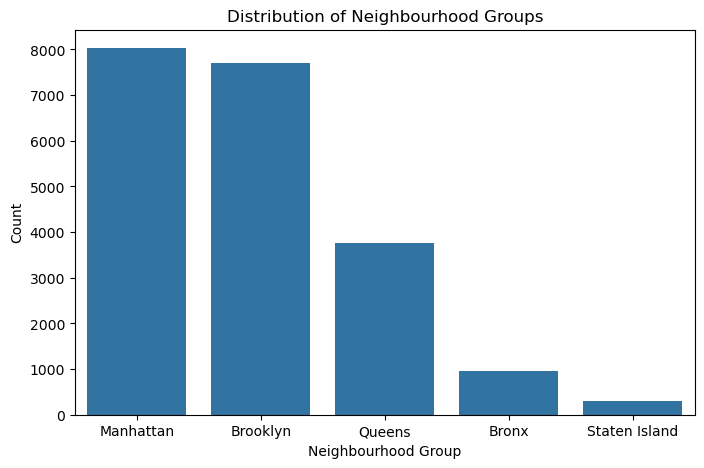

In [28]:
# 1. Neighbourhood Group
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title('Distribution of Neighbourhood Groups')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

Manhattan and Brooklyn Dominate:

Manhattan and Brooklyn have the highest number of listings, each exceeding 7,000. These neighborhoods are likely the most popular due to their central location, attractions, and amenities. Queens in Third Place:

Queens has significantly fewer listings compared to Manhattan and Brooklyn but still has a notable presence, with around 4,000 listings. It may cater to budget travelers or those seeking proximity to certain locations like airports. Low Representation in Bronx and Staten Island:

The Bronx has a much smaller number of listings compared to the top three neighborhoods, indicating lower demand or fewer Airbnb offerings. Staten Island has the least number of listings, showing minimal host and guest activity in this area.

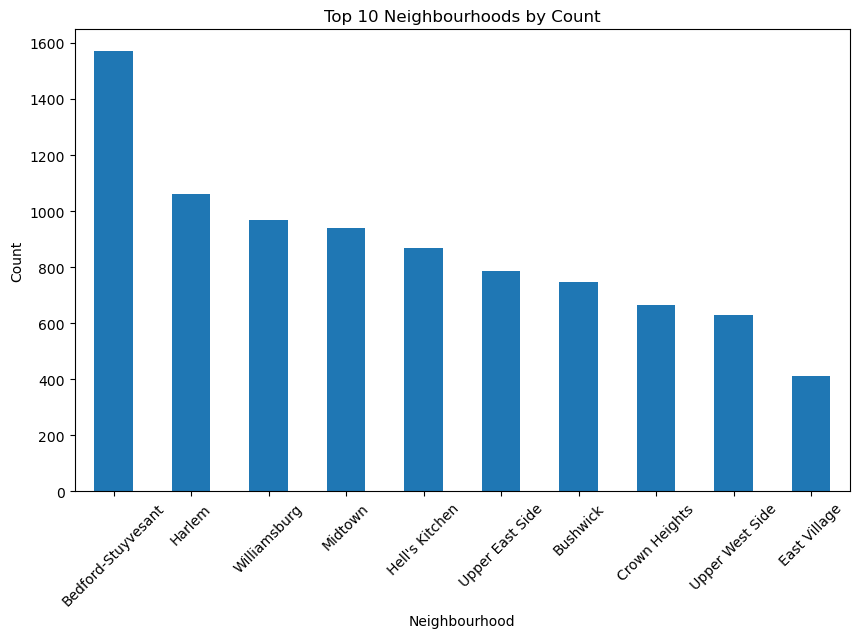

In [29]:
# 2. Neighbourhood
plt.figure(figsize=(10, 6))
top_neighbourhoods = df['neighbourhood'].value_counts().head(10)  # Top 10 neighbourhoods
top_neighbourhoods.plot(kind='bar')
plt.title('Top 10 Neighbourhoods by Count')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

 A few specific neighbourhoods have a significantly higher number of listings.

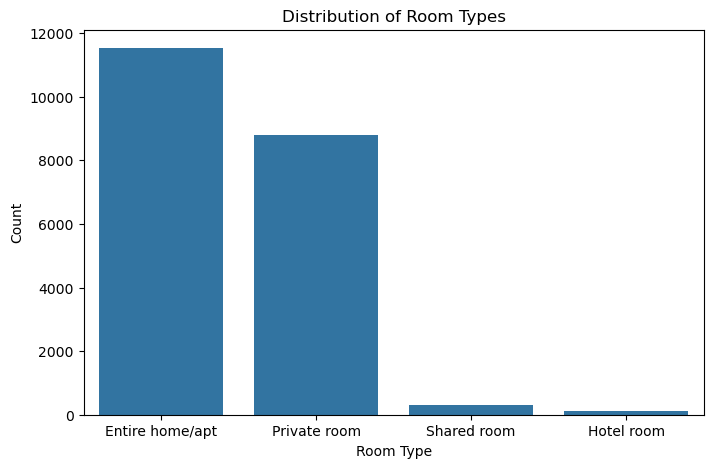

In [30]:
# 3. Room Type

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

Entire home/apt and Private room are the most common room types.

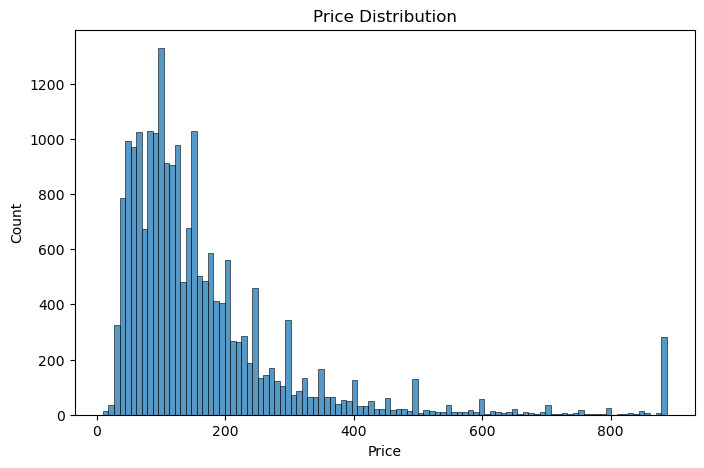

In [31]:
# 4. Price
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='price')
plt.title('Price Distribution')
plt.xlabel('Price')  # Limit outliers for better visualization
plt.show()

Peak Distribution:
The majority of listings are priced between $50 and $300, with a noticeable peak around $200.
This indicates that most properties are affordable and cater to budget-conscious travelers.

Higher Price Range:
Listings priced above $300 become less frequent, showing that premium accommodations are a smaller segment of the market.


Dynamic Pricing: 
Hosts can focus on adjusting prices within the $50–$200 range to attract more guests, as this is the most competitive range.

Target Marketing:
High-end listings (above $300) should emphasize luxury features and premium experiences to justify their price.

Data-Driven Pricing Strategy: 
Use machine learning models to predict optimal prices based on factors like location, room type, and seasonality.    

<Axes: ylabel='minimum_nights'>

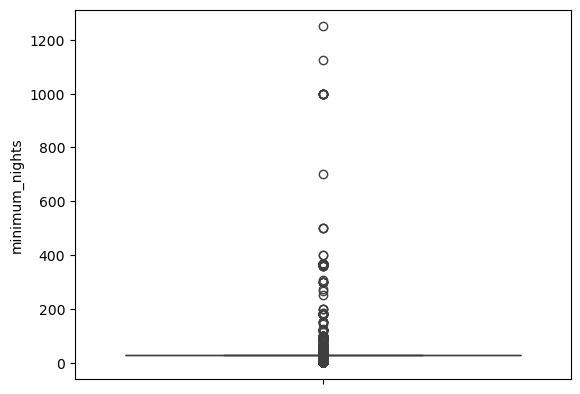

In [32]:
sns.boxplot(df['minimum_nights'])

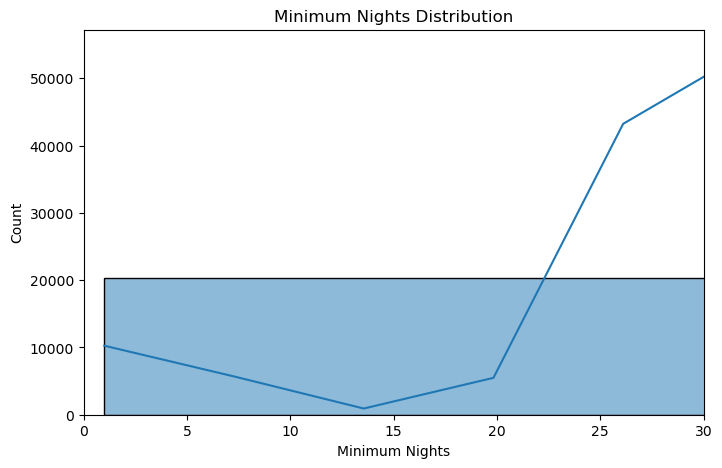

In [33]:
# 6. Minimum Nights
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='minimum_nights', bins=30, kde=True)
plt.title('Minimum Nights Distribution')
plt.xlabel('Minimum Nights')
plt.ylabel('Count')
plt.xlim(0, 30)  # Focus on shorter minimum nights
plt.show()

Most listings have a minimum nights requirement of less than 30 days.

Analyze the impact of minimum stay restrictions on occupancy rates and revenue.


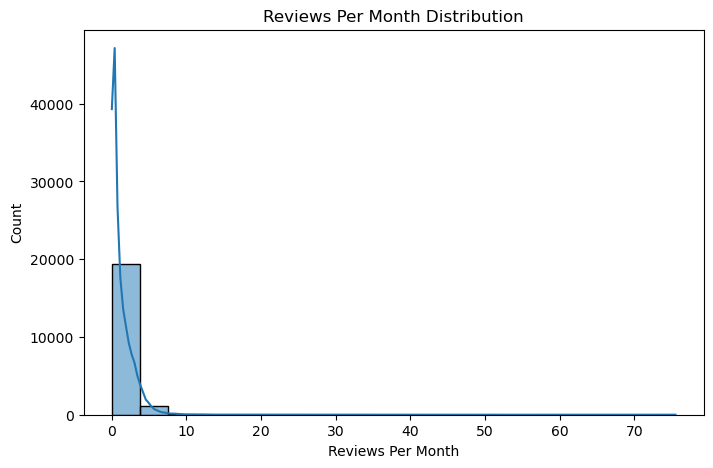

In [34]:
# 8. Reviews per Month
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='reviews_per_month', bins=20, kde=True)
plt.title('Reviews Per Month Distribution')
plt.xlabel('Reviews Per Month')
plt.ylabel('Count')
plt.show()

 Most listings receive fewer than one review per month.
Action: Target marketing strategies to increase bookings and review frequency.

Most properties receive few reviews per month. The majority of properties have a very low review rate, with most falling between 0 and 1 reviews per month. This suggests that many properties either don't receive many bookings or don't receive many reviews from their guests.

A small number of properties receive many reviews per month. There is a long tail to the right of the histogram, indicating that a small number of properties receive a large number of reviews per month. This could be due to a variety of factors, such as high occupancy rates, high guest satisfaction, or active solicitation of reviews from guests.

<Axes: ylabel='calculated_host_listings_count'>

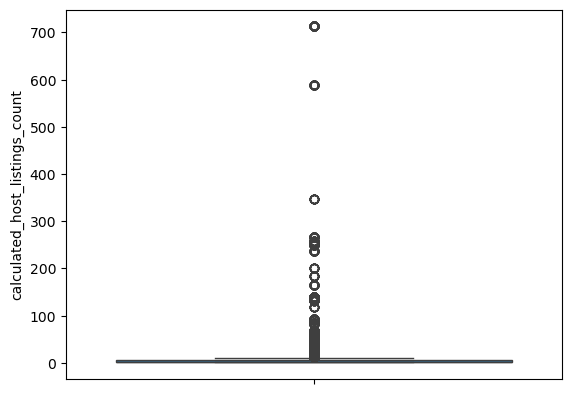

In [35]:
sns.boxplot(df['calculated_host_listings_count'])

In [36]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['calculated_host_listings_count'].quantile(0.10)
Q3 = df['calculated_host_listings_count'].quantile(0.90)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Replace outliers with the lower or upper limit
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)

# Print the new summary statistics
print("Updated calculated_host_listings_count Column Statistics:")
print(df['calculated_host_listings_count'].describe())

Updated calculated_host_listings_count Column Statistics:
count    20724.000000
mean         9.407933
std         19.031175
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max         75.250000
Name: calculated_host_listings_count, dtype: float64


<Axes: ylabel='calculated_host_listings_count'>

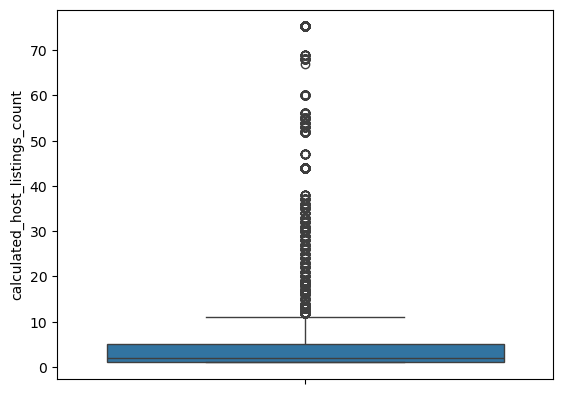

In [37]:
sns.boxplot(df['calculated_host_listings_count'])

<Axes: xlabel='calculated_host_listings_count', ylabel='Count'>

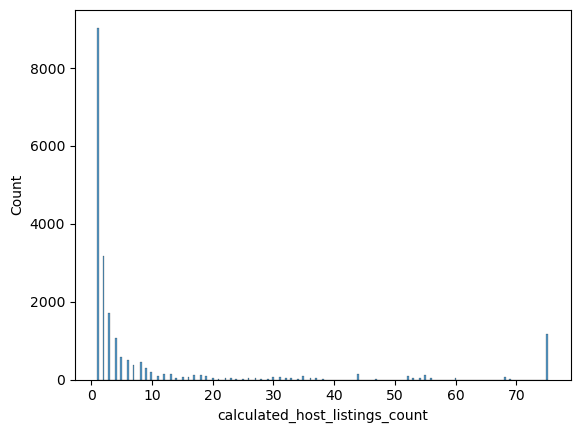

In [38]:
sns.histplot(df['calculated_host_listings_count'])

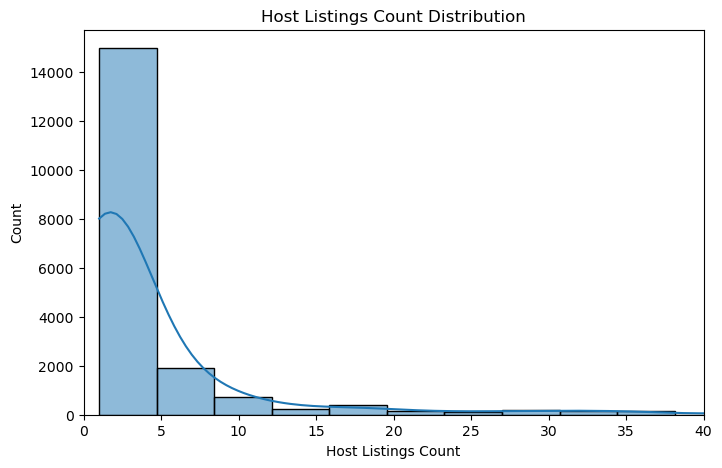

In [39]:
# 9. Calculated Host Listings Count
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='calculated_host_listings_count', bins=20, kde=True)
plt.title('Host Listings Count Distribution')
plt.xlabel('Host Listings Count')
plt.ylabel('Count')
plt.xlim(0, 40)  # Focus on smaller host portfolios
plt.show()

Most hosts manage only a small number of listings
Shape: The distribution appears to be right-skewed (or positively skewed). This means that a majority of hosts have a smaller number of listings, while a few hosts have a significantly large number of listings.

Peak: The peak of the distribution lies between 0 and 5 listings. This suggests that the most common number of listings for hosts is within this range.

Tail: The distribution has a long tail extending towards the right. This indicates that there are some hosts with a very high number of listings, which contributes to the skewness.

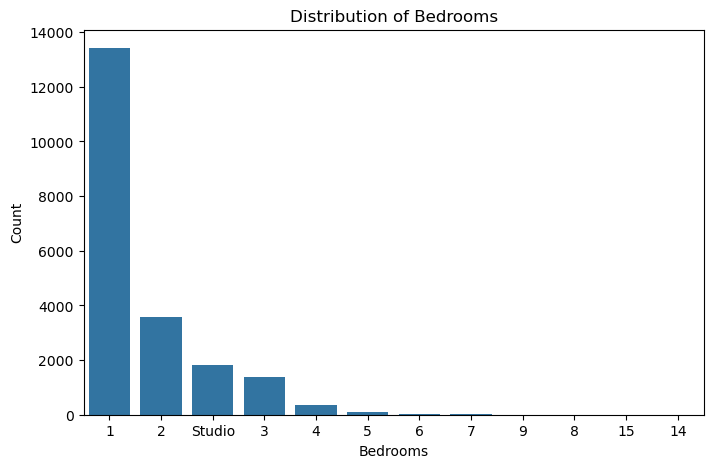

In [40]:
# 10. Bedrooms

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='bedrooms', order=df['bedrooms'].value_counts().index)
plt.title('Distribution of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

Listings with 1-2 bedrooms dominate the market.

Action: Focus on pricing strategies for these types of properties as they represent the bulk of the inventory.

In [41]:
df['license']

0                No License
1                No License
2                    Exempt
3                No License
4                No License
                ...        
20765            No License
20766            No License
20767            No License
20768            No License
20769    OSE-STRREG-0000513
Name: license, Length: 20724, dtype: object

In [42]:
df['license'].value_counts()

license
No License            17543
Exempt                 2131
OSE-STRREG-0000068       14
OSE-STRREG-0000437        6
OSE-STRREG-0008664        6
                      ...  
OSE-STRREG-0000105        1
OSE-STRREG-0000300        1
OSE-STRREG-0000782        1
OSE-STRREG-0000142        1
OSE-STRREG-0000513        1
Name: count, Length: 877, dtype: int64

<Axes: ylabel='bed per price'>

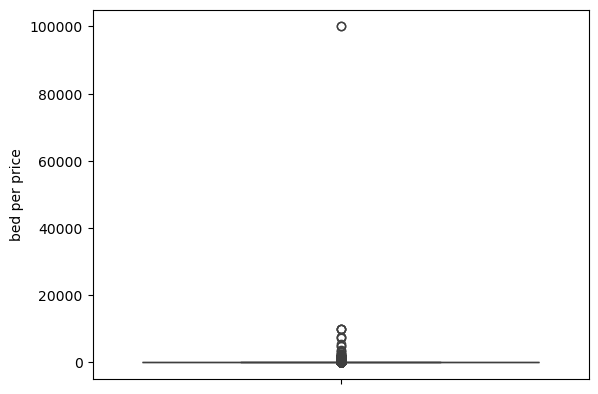

In [43]:
sns.boxplot(df['bed per price'])

In [44]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['bed per price'].quantile(0.10)
Q3 = df['bed per price'].quantile(0.90)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Replace outliers with the lower or upper limit
df['bed per price'] = df['bed per price'].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)

# Print the new summary statistics
print("Updated 'bed per price' Column Statistics:")
print(df['bed per price'].describe())

Updated 'bed per price' Column Statistics:
count    20724.000000
mean       107.925705
std         78.654653
min          3.333333
25%         55.000000
50%         85.000000
75%        131.000000
max        440.000000
Name: bed per price, dtype: float64


<Axes: xlabel='bed per price', ylabel='Count'>

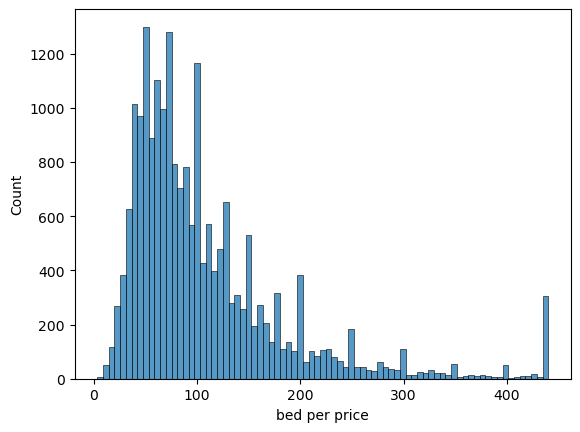

In [45]:
sns.histplot(df['bed per price'])

Peak Distribution: The majority of bed per price between 
$50 ang $150, with a noticeable peak around $150. This indicates that most beds are affordable and cater to budget-conscious travelers.

# bivariate analysis


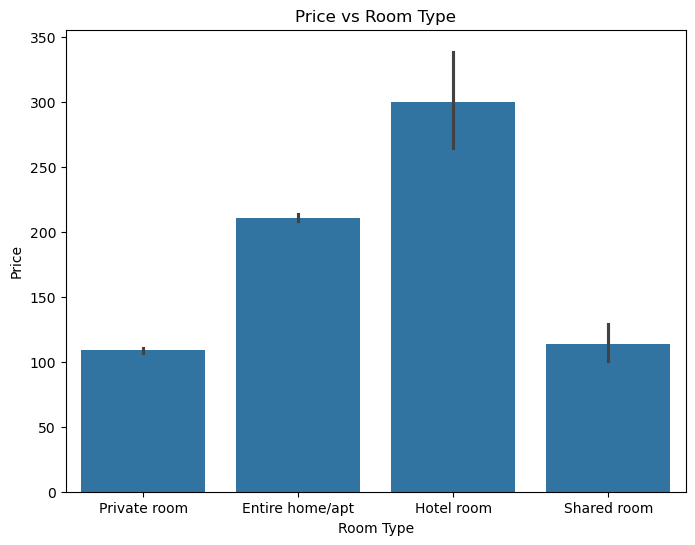

In [46]:
# 1. Price vs Room Type
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='room_type', y='price')
plt.title('Price vs Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


Entire homes/apartments usually have higher prices compared to private or shared rooms.
Action: Emphasize listing features to attract guests willing to pay a premium for private accommodations.

Hotel Rooms have the highest median price among all room types, significantly higher than private rooms, shared rooms, and entire homes/apartments. This indicates that hotel rooms are positioned as a premium offering on the platform.

Action: Hosts of hotel rooms can leverage this trend to target luxury travelers but should ensure their offerings justify the price.
Entire Home/Apartments are priced moderately high compared to private or shared rooms, appealing to families or groups seeking privacy and exclusive accommodations.

Action: Emphasize the privacy and space advantages of entire homes to attract longer-staying guests.
Private Rooms are priced lower than entire homes/apartments, making them a budget-friendly choice for solo travelers or those on tighter budgets.

Action: Highlight affordability and cozy experiences to target budget-conscious guests.
Shared Rooms have the lowest prices, indicating they cater to the most budget-sensitive segment of the market, such as backpackers.

Action: Promote shared rooms in areas with high tourist traffic to maximize occupancy.

Variability in Pricing:
The variability in prices is greater for hotel rooms and entire homes/apartments, suggesting more diverse listings and potential for premium pricing.
Shared and private rooms show relatively consistent pricing with fewer outliers.


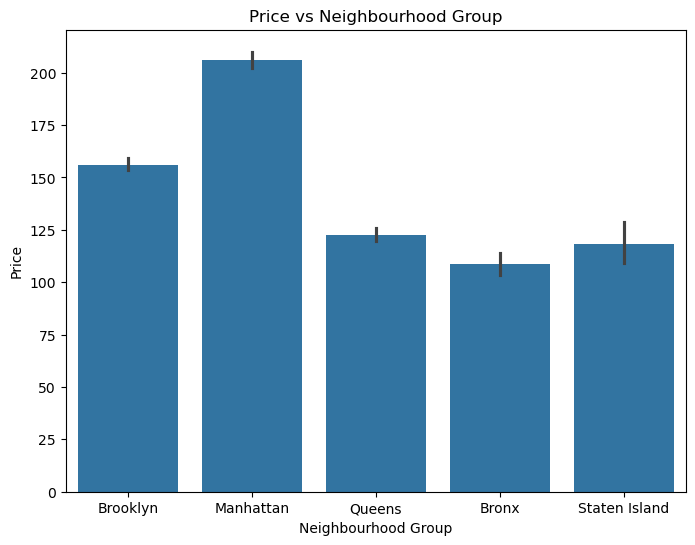

In [47]:
# 2. Price vs Neighbourhood Group
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='neighbourhood_group', y='price')
plt.title('Price vs Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.show()

Listings in Manhattan and Brooklyn likely have higher prices due to demand and location advantages.
Action: Adjust prices for listings in less expensive areas (e.g., Queens, Bronx) to remain competitive.

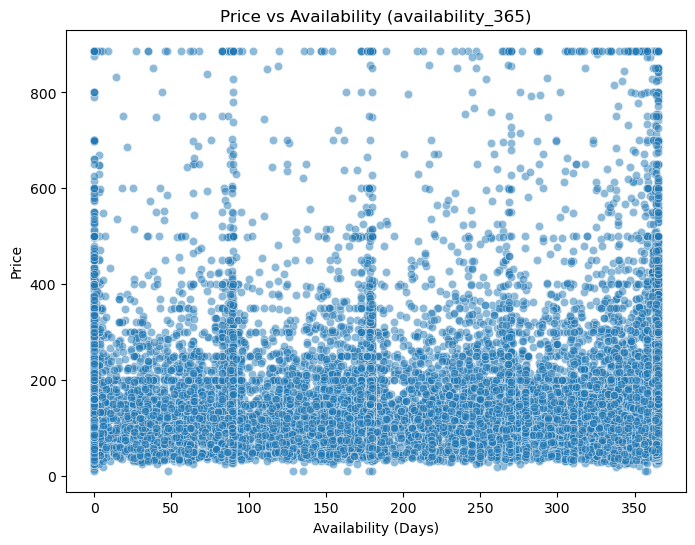

In [48]:
# 3. Price vs Availability (availability_365)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='availability_365', y='price', alpha=0.5)
plt.title('Price vs Availability (availability_365)')
plt.xlabel('Availability (Days)')
plt.ylabel('Price')
plt.show()

In [49]:
df['price'].corr(df['availability_365'])

0.05178695889813739


High prices might correlate with lower availability, indicating selective booking practices.

Action: Optimize pricing for properties with high availability to fill gaps.

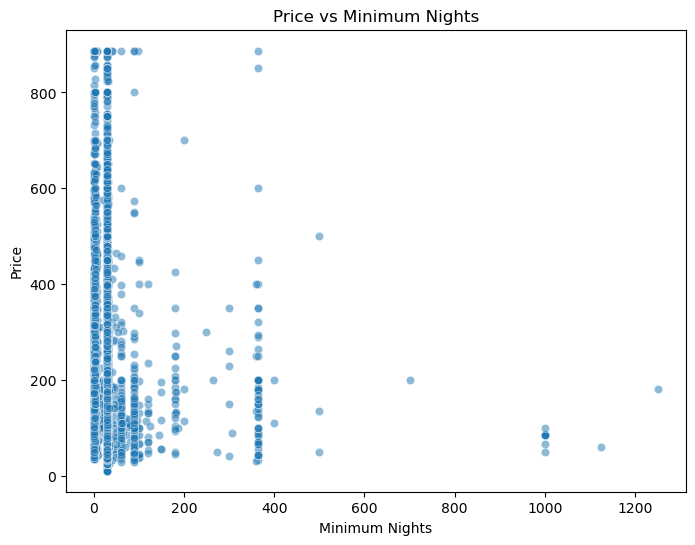

In [50]:
# 4. Price vs Minimum Nights
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='minimum_nights', y='price', alpha=0.5)
plt.title('Price vs Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show() 

Listings with extremely high minimum nights may face lower occupancy, leading to irregular pricing trends.

Action: Recommend flexible booking policies to increase revenue potential.

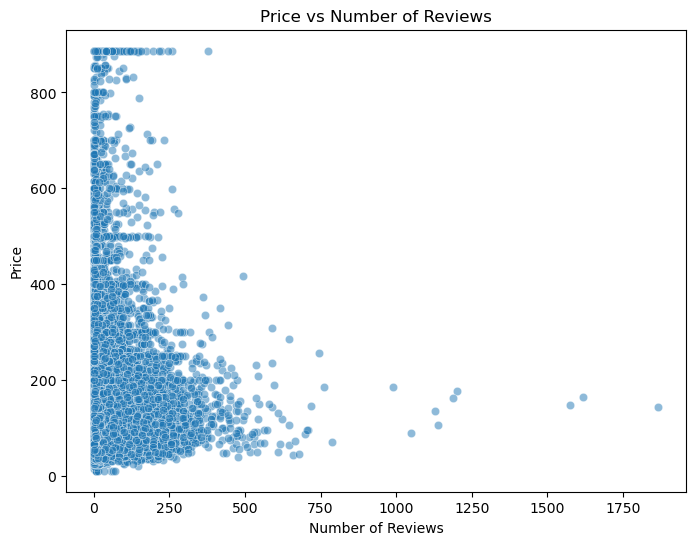

In [51]:
# 5. Price vs Number of Reviews
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='number_of_reviews', y='price', alpha=0.5)
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

Highly reviewed listings generally have stable prices, suggesting a trust factor influencing bookings.
    
Action: Encourage hosts to improve service quality and gather more reviews.


In [52]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths', 'bed per price'],
      dtype='object')

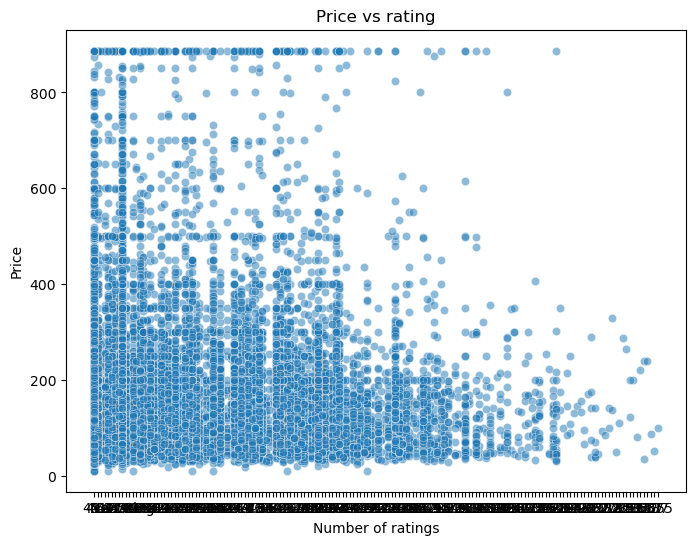

In [53]:
# 5. Price vs Number of Reviews

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='rating', y='price', alpha=0.5)
plt.title('Price vs rating')
plt.xlabel('Number of ratings')
plt.ylabel('Price')
plt.show()

Dense Cluster at Lower Price Range:

A majority of data points are concentrated in the price range below $200, with varying numbers of ratings.
Indicates that lower-priced options dominate and are widely rated.
Sparse High-Price Listings:

Listings above $600 are relatively few and have fewer ratings, suggesting limited customer engagement or niche markets.
No Strong Correlation:

There is no clear relationship between price and the number of ratings, as data points are scattered across the plot.
High Ratings for Low Prices:

Listings with a high number of ratings are predominantly in the lower price range, indicating popularity among budget-conscious customers.

Affordable Options Attract More Customers: Listings with lower prices may appeal to a broader audience, leading to more bookings and consequently more rating.
Luxury Listings: Higher-priced listings could cater to niche markets, resulting in fewer bookings and rating.

# multivariate analysis

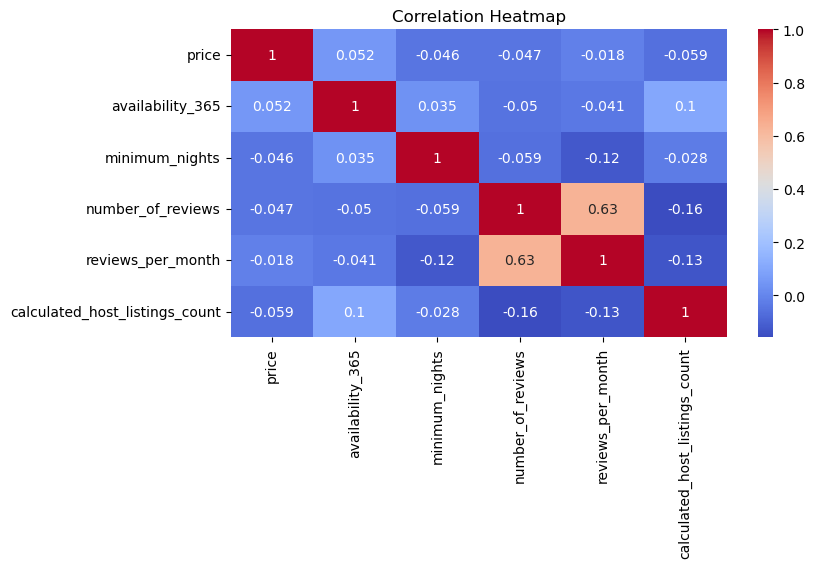

In [55]:
# Correlation Heatmap: Analyzing the correlation between numerical columns
plt.figure(figsize=(8, 4))
correlation = df[['price', 'availability_365', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

High positive/negative correlations between numerical features can indicate significant relationships.

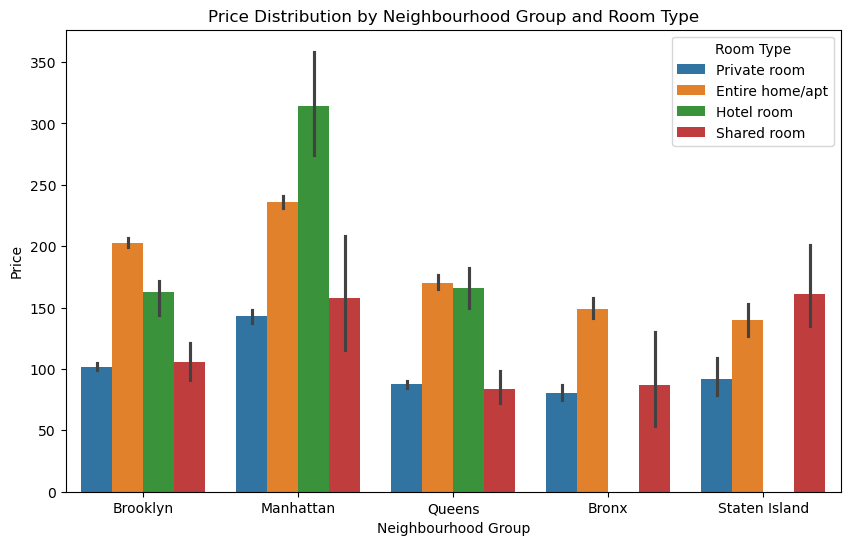

In [57]:
# Multivariate Analysis: 
#Price vs Room Type vs Neighbourhood Group

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type')
plt.title('Price Distribution by Neighbourhood Group and Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.legend(title='Room Type')
plt.show()

Manhattan Dominates in Pricing:
Manhattan listings, especially for Entire home/apt and Hotel rooms, have the highest average prices compared to other neighborhoods.
This highlights that Manhattan is a prime location where guests are willing to pay a premium, likely due to its central location and high demand.

Room Type Impact on Pricing:
Across all neighborhoods, Entire homes/apartments and Hotel rooms are consistently priced higher than Private rooms and Shared rooms.
This indicates that larger and more private accommodations command a higher price, aligning with the preference for exclusivity.

Brooklyn and Queens as Affordable Options:
While prices in Brooklyn and Queens are lower than Manhattan, they still see relatively higher pricing for Entire homes/apartments.
These neighborhoods could be positioned as cost-effective alternatives to Manhattan while still offering competitive amenities.

Shared Rooms Are Less Expensive:
Across all neighborhoods, Shared rooms have the lowest prices, indicating they cater to budget-conscious travelers or those with minimal privacy needs.

Neighborhood-Specific Pricing Strategies:
Bronx and Staten Island: Listings in these areas have lower average prices overall, suggesting they target a different segment of travelers, possibly those seeking affordability.
However, Staten Island shared rooms have relatively higher pricing variability, which could indicate unique demand or limited supply in this category.

Price Variability:
The variability (error bars) is significant in Hotel rooms in Manhattan, indicating a wide range of price offerings. Hosts could explore dynamic pricing strategies to capture demand more effectively.



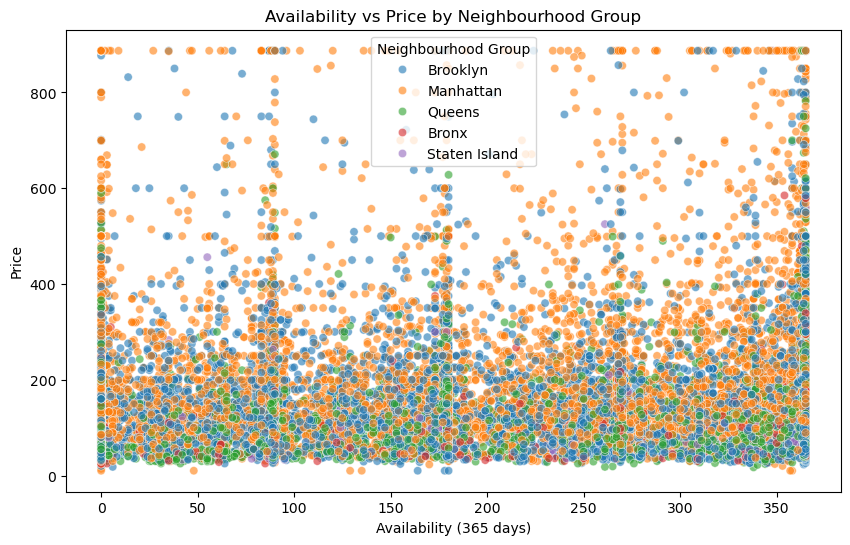

In [58]:
# Availability vs Price: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='availability_365', y='price', hue='neighbourhood_group', alpha=0.6)
plt.title('Availability vs Price by Neighbourhood Group')
plt.xlabel('Availability (365 days)')
plt.ylabel('Price')
plt.legend(title='Neighbourhood Group')
plt.show()

Listings with very low or very high availability (close to 365 days) might have distinct pricing patterns. Frequent availability might reduce urgency and therefore price.

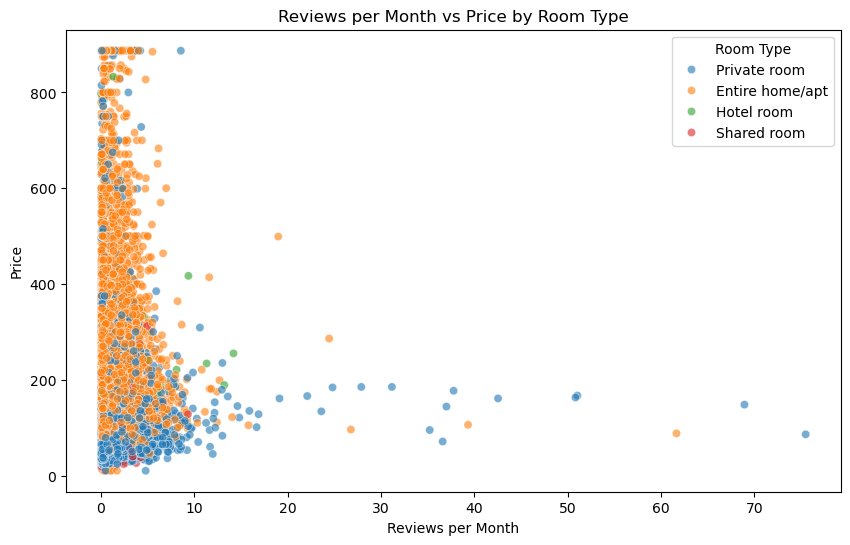

In [59]:
# Reviews per Month vs Price: Analyzing demand and pricing
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='reviews_per_month', y='price', hue='room_type', alpha=0.6)
plt.title('Reviews per Month vs Price by Room Type')
plt.xlabel('Reviews per Month')
plt.ylabel('Price')
plt.legend(title='Room Type')
plt.show()

Listings with frequent reviews may indicate higher demand, potentially justifying higher prices. The trend can vary by room type, with private rooms often attracting more frequent bookings.


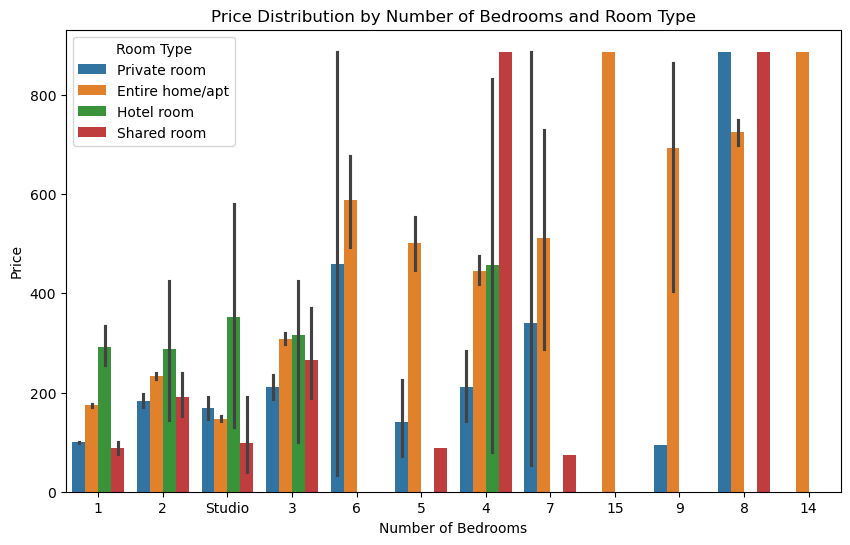

In [61]:
# Price vs Number of Bedrooms vs Room Type
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='bedrooms', y='price', hue='room_type')
plt.title('Price Distribution by Number of Bedrooms and Room Type')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.legend(title='Room Type')
plt.show()

Prices tend to increase with the number of bedrooms, particularly for entire homes/apartments.